In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics
import scipy.special
import seaborn as sns
import pandas as pd
import requests
import PIL
import scipy.stats
import sklearn.linear_model

# *Notebook exploring all things linear regression*


# **1. Background on LEAST SQUARES AND MLE**


 trained to minimise least squares - which is the equivalent of maximizing likelihood if we assume i.i.d normally distributed errors

$ f(x,\mu,\sigma) = = \dfrac{1}{\sigma \sqrt{2\pi}} e^{ -\dfrac{1}{2} (\dfrac{x - \mu}{\sigma})^2 } $

1. Imagine $\hat{y_i}$ (our model estimate) is the mean of a normal distirbution (with this distribution representing i.i.d normal errors) 
2. Now we can work out the likelihood of the observations given the model

$ L(\hat{Y},Y) = \prod_i \dfrac{1}{\sigma \sqrt{2\pi}} e^{ -\dfrac{1}{2} (\dfrac{\hat{y_i} - y_i}{\sigma})^2 } $

$ l(\hat{Y},Y) = l(x,\mu,\sigma) = \sum_i -ln(\sigma \sqrt{2\pi}) -  {\dfrac{1}{2} (\dfrac{x - \mu}{\sigma})^2 } $

front term sigma does not change so MLE comes from minimizing

$ \dfrac{\sigma^2}{2} \sum_i { (x - \mu)^2 }$

### **LITERALLY MINIMIZING THE SUM OF SQUARES**


*Interestingly wikipedia says its came hte other way round and hte normal distribution cam about by thinking what distribution would result in LS as its MLE*


# **2. Application to linear regression**


linear prediction predicts on a linear scale (e.g. univariate case...)

$ \hat{Y} = BX $

$\hat{y_i} = b_1x_i + b_0$

likelihood = 


# *??? CAN WORK OUT FOR JUST bi AND ALSO bi+b0 (jusr requires setting a multivariable likelihood and finding global mimum) - IS A MINIMUM FOR BOTH GARUENTEED TO EXIST - HMMMMMMMMM INTERESTING QUESTION _ HOW CAN WE BE SURE THAT A POINT EXISTS x,y where f'x and f'y are both 0*

#start with just estimating b1 (fixing b0 to be 0)

$ l(b_i) =  \sum_i -ln(\sigma \sqrt{2\pi}) -  {\dfrac{1}{2} (\dfrac{y_i - b_1x_i}{\sigma})^2 } $

moving constants outside of the sum

$ l(b_i) = -nln(\sigma \sqrt{2\pi}) - \dfrac{n}{2\sigma^2} \sum_i  { (y_i - b_1x_i)^2 } $

Maximum likelihood estimate = argmax with repect with respect to bi

usign the score funciton (derivative with respect to b1) to analytically calculate b_1 - this 
is not always possible

$ S(b_i) = \dfrac{n}{2\sigma^2} \sum_i  { 2x_i(y_i - b_1x_i) } $  

minimum when score = 0 

$ 0 = \dfrac{n}{2\sigma^2} \sum_i  { 2x_i(y_i - b_1x_i) }$

$ 0 =  \sum_i  { 2x_i(y_i - b_1x_i) } $

### ?at this step we can find an analytical solution using a little bit of linear algebra or solve this numerically using gradient descent

### Analytic method

$ 0 =  \sum_i  { 2x_i(y_i - b_1x_i) } $

$ 0 =  \sum_i  ({ 2x_iy_i - 2b_1x_i^2}) $


$ \sum_i 2b_1x_i^2 =  \sum_i 2x_iy_i  $

$ b1 \sum_i 2x_i^2 =  \sum_i 2x_iy_i  $

$ b1 =  \dfrac{\sum_i x_iy_i}{\sum_i x_i^2}   $

SIDENOTE: this is not the correlation coefficient hahahah

0.9292929292929293
[[0.92929293]]


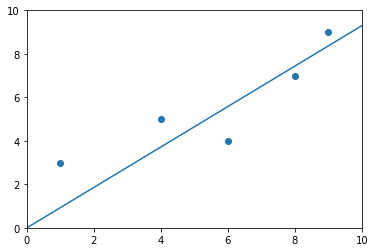

In [4]:
#Analytic method

x = np.array([1,4,6,8,9])
y = np.array([3,5,4,7,9])

b1 = sum(x*y) / sum(x**2)
print(b1)

X = np.linspace(0,10,100)
yhat = X*b1


#equivalence
model = sklearn.linear_model.LinearRegression(fit_intercept = False)
model.fit(x.reshape(-1,1),y.reshape(-1,1))
print(model.coef_)



fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.scatter(x,y)
ax.plot(X,yhat)


### Gradient descent

Even if we cannot solve score for B we can use it to calculate the gradient for a given (b) and then update b based on this gradient

Recall

$ l(b_i) = -nln(\sigma \sqrt{2\pi}) - \dfrac{n}{2\sigma^2} \sum_i  { (y_i - b_1x_i)^2 } $

$ S(b_i) = \dfrac{n}{2\sigma^2} \sum_i  { 2x_i(y_i - b_1x_i) } $  

Again we can remove all the positive contant terms as we will scale hte gradient by our own learning rate anyway (lambda)

$ S(b_i) = \sum_i  { x_i(y_i - b_1x_i) } $  

Gradient step = 

$ step = \lambda  \sum_i  { x_i(y_i - b_1x_i) } $



step: 0.184
step: 0.147568
step: 0.11834953600000002
step: 0.09491632787200001
step: 0.07612289495334398
step: 0.061050561752581875
step: 0.04896255052557068
step: 0.03926796552150768
step: 0.031492908348249166
step: 0.025257312495295833
estiamte after 10 epochs: 0.8269880574685492
true coefficient: 0.9292929292929297


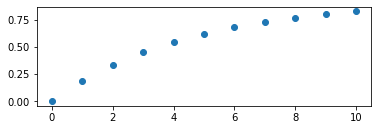

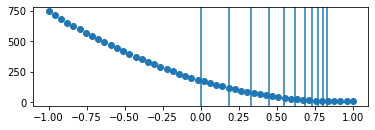

In [5]:
# gradient descent
x = np.array([1,4,6,8,9])
y = np.array([3,5,4,7,9])

l = 0.001

binitial = 0
blist = [binitial]
#training based on number of epochs
epochs = 10
for i in range(epochs):
    score = sum(x*(y-blist[-1]*x))
    blist.append( blist[-1] + l * score )

    print("step: %r" % (l*score))

#this is the gradient with respect to b hence why we can use it directly to step with b

print("estiamte after %r epochs: %r" % (epochs,blist[-1]))

#equivalence
model = sklearn.linear_model.LinearRegression(fit_intercept = False)
model.fit(x.reshape(-1,1),y.reshape(-1,1))
print("true coefficient: %r" % model.coef_[0][0])

#plotting convergence
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
ax.scatter([i for i in range(len(blist))],blist)

#if lambda is too large it doesnt converge
#printing loss funciton as a funciton of b1
#to examine this point

B = np.linspace(-1,1)
logl = [ sum((y-b*x)**2) for b in B]
fig = plt.figure()
ax = fig.add_subplot(2,1,2)
ax.scatter(B,logl)
for i in blist:
    ax.axvline(x = i)

#if lambda is too large - the funciton jumps higher up the other side of the log likelihood
# shooting high either side 
# very interesting divergence pattern


### adding in the intercept and other predictors

Startign with the intercept b0

$ l(b_i) = -nln(\sigma \sqrt{2\pi}) - \dfrac{n}{2\sigma^2} \sum_i  { (y_i - b_1x_i)^2 } $

$ S(b_i) = \dfrac{n}{2\sigma^2} \sum_i  { 2x_i(y_i - b_1x_i) } $  

becomes


$ l(b_i) = -nln(\sigma \sqrt{2\pi}) - \dfrac{n}{2\sigma^2} \sum_i  { (y_i - b_1x_i+b_0)^2 } $

$ S(b_i) \sim \sum_i  { x_i(y_i - (b_1x_i + b_0)) } $ 

$ S(b_0) \sim  \sum_i  { (y_i - (b_1x_i + b_0)) } $ 

### **Analytic solution**

$ 0 = \sum_i  { x_i(y_i - (b_1x_i + b_0)) } $ 

$ 0 = \sum_i  { (y_i - (b_1x_i + b_0)) } $

this is a set of linear equations with respect to b1 and b0

$ 0 = \sum_i   x_iy_i - \sum_i  b_1x_i^2 - \sum_i  b_0x_i   $ 

$ 0 = \sum_i  y_i - \sum_i  b_1x_i -  \sum_i b_0  $

further simplifying

$ 0 = \sum_i   x_iy_i - b_1 \sum_i  x_i^2 - b_0 \sum_i x_i   $ 

$ 0 = \sum_i  y_i - b_1 \sum_i  x_i -  b_0n  $

let $ B = 
\begin{bmatrix}
b_1 \\
b_0 \\
\end{bmatrix} $

let $ A = 
\begin{bmatrix} 
\sum_i  x_i^2 & \sum_i x_i \\
\sum_i x_i & n \\
\end{bmatrix} $

let $ Y = 
\begin{bmatrix}
\sum_i   x_iy_i \\
\sum_i   y_i \\
\end{bmatrix} $

$ AB = Y $

**NOTE A IS CONSTANT WITH RESPECT TO B SO IT IS JUST A MATRIX OF NUMBERS**

$ B = A^{-1}Y $

$ A^{-1} $ can be easily found via gaussian elimination 

#generalization of Newton's method of multiplicative inverse algorithm????


[[0.66019417]
 [1.90291262]]
[[0.66019417]] [1.90291262]


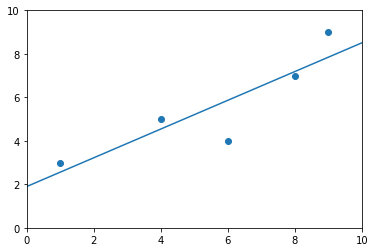

In [6]:
#Analytic method

x = np.array([1,4,6,8,9])
y = np.array([3,5,4,7,9])

A = np.array([[sum(x**2),sum(x)],[sum(x),len(x)]])
Y = np.array([[sum(x*y)],[sum(y)]])

B = np.linalg.inv(A)@Y
print(B)


X = np.linspace(0,10,100)
yhat = X*B[0]+B[1]

#equivalence
model = sklearn.linear_model.LinearRegression()
model.fit(x.reshape(-1,1),y.reshape(-1,1))
print(model.coef_,model.intercept_)

fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.scatter(x,y)
ax.plot(X,yhat)



### using gradient descent

exact same thing as before just updating both 

$ l(b_i) = -nln(\sigma \sqrt{2\pi}) - \dfrac{n}{2\sigma^2} \sum_i  { (y_i - b_1x_i -b_0)^2 } $


Gradient step = 

$ step(b_i) = \lambda  \sum_i  { x_i(y_i - b_1x_i - b_0) } $

$ step(b_i) = \lambda  \sum_i  {(y_i - b_1x_i - b_0) } $



estiamte after 10000 epochs: b1 = 0.6602035043468575 , b0 = 1.902846987664058
true coefficient: b1 = 0.6601941747572816, b0 = array([1.90291262])


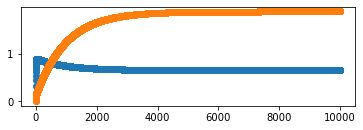

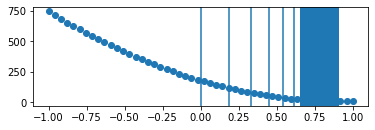

In [7]:
# gradient descent
x = np.array([1,4,6,8,9])
y = np.array([3,5,4,7,9])

l = 0.001

b1 = 0
b0 = 0
b1list = [b1]
b0list = [b0]

#training based on number of epochs
epochs = 10000
for i in range(epochs):
    scoreb1 = sum(x*(y-b1list[-1]*x-b0list[-1]))
    scoreb0 = sum((y-b1list[-1]*x-b0list[-1]))
    b1list.append( b1list[-1] + l * scoreb1 )
    b0list.append( b0list[-1] + l * scoreb0 )

    #print("step b1: %r" % (l*scoreb1))
    #print("step b0: %r" % (l*scoreb0))

#this is the gradient with respect to b hence why we can use it directly to step with b

print("estiamte after %r epochs: b1 = %r , b0 = %r" % (epochs,b1list[-1],b0list[-1]))

#equivalence
model = sklearn.linear_model.LinearRegression()
model.fit(x.reshape(-1,1),y.reshape(-1,1))
print("true coefficient: b1 = %r, b0 = %r" % (model.coef_[0][0],model.intercept_))

#plotting convergence
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
ax.scatter([i for i in range(len(b1list))],b1list)
ax.scatter([i for i in range(len(b0list))],b0list)

#if lambda is too large it doesnt converge
#printing loss funciton as a funciton of b1
#to examine this point

B = np.linspace(-1,1)
logl = [ sum((y-b*x)**2) for b in B]
fig = plt.figure()
ax = fig.add_subplot(2,1,2)
ax.scatter(B,logl)
for i in b1list:
    ax.axvline(x = i)

# very interesting pattern of convergence! starting with b1 = 0 b0 = 0 and lambda = 0.001

#it also takes a lot longer to converge!

### Newton raphson alteration

In [8]:
#newton raphson alteration....

